In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns      
plt.style.use("ggplot") 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from  sklearn import model_selection

## EDA & Preprocessing 

In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
def examine_data(df):
    for data in df:
        print(data.head(5))
        print(data.info())
        print(data.columns)
        print('*'*50)

examine_data([train_df])

   ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.6266  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  16.5338  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  14.6155  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  14.9250  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  19.2514  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0

## Feature Engineering

### Missing Value

In [4]:
train_df.isnull().sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

No missing value in this dataset

### Outlier

In [5]:
train_df['target'].unique()

array([0, 1], dtype=int64)

No other value other than 0 and 1

### Examine the target variable 


### (1）Distribution of customers who were classified as 0 and 1 

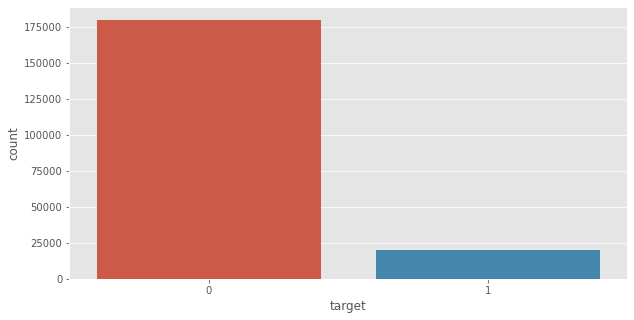

In [6]:
plt.figure(figsize=(10,5))
sns.countplot(x='target', data=train_df)
plt.show()

Through this step, it can be observed that the number of type 0 users and type 1 users is unbalanced in the training data,that is, data skew occurs, which also requires us to deal with the problem of data balance when training the model.



### (2) Normalization 

In [7]:
train_df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [8]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_copy = train_df.copy()
data_1 = train_copy.drop(columns=['ID_code','target'])
data_scaled = ss.fit_transform(data_1)  # Normalized the dataset 
train_scaled_df = pd.DataFrame(data_scaled)
train_scaled_df.columns = data_1.columns
df_1 = pd.concat([train_copy['target'],train_scaled_df],axis = 1,join = 'inner') # combined the feature and target columns 

df_1.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,...,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05
mean,0.100490,6.945200e-16,-2.685852e-17,-7.314682e-16,-7.457146e-17,-6.225065e-16,3.389289e-17,-8.910206e-17,6.768275e-16,-4.583001e-18,...,1.140421e-17,2.091483e-16,1.104894e-16,1.252687e-16,-7.934631e-16,4.181544e-17,4.160228e-17,-7.626610e-16,1.379874e-16,3.112177e-17
std,0.300653,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,...,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,0.000000,-3.378739e+00,-3.312510e+00,-3.255758e+00,-3.345903e+00,-3.698703e+00,-3.496937e+00,-3.532923e+00,-3.275579e+00,-3.237586e+00,...,-3.800018e+00,-3.350719e+00,-3.884107e+00,-3.786347e+00,-2.966165e+00,-3.581239e+00,-3.027477e+00,-3.198224e+00,-3.178883e+00,-3.403554e+00
25%,0.000000,-7.322476e-01,-7.684882e-01,-7.545633e-01,-7.548787e-01,-7.363223e-01,-7.802162e-01,-7.399549e-01,-7.612636e-01,-7.807544e-01,...,-7.222214e-01,-7.544853e-01,-7.021442e-01,-6.881662e-01,-7.540249e-01,-7.196264e-01,-7.792415e-01,-7.110907e-01,-6.778686e-01,-7.551204e-01
50%,0.000000,-5.104015e-02,4.832475e-03,-5.119182e-02,1.393366e-02,1.843135e-02,2.952565e-02,-2.751966e-02,-2.605270e-02,3.286843e-02,...,-6.763242e-03,-2.998690e-02,-1.795060e-02,1.617635e-02,-1.142980e-02,-2.141614e-02,1.935421e-02,-2.165493e-02,2.103323e-02,4.857132e-02
75%,0.000000,6.836369e-01,7.373387e-01,6.821601e-01,7.475948e-01,7.287035e-01,7.617868e-01,6.854925e-01,7.480983e-01,7.962906e-01,...,6.955751e-01,6.860521e-01,6.910499e-01,7.199428e-01,7.663868e-01,6.798025e-01,7.798153e-01,7.434083e-01,7.286782e-01,7.820795e-01
max,1.000000,3.169391e+00,2.964030e+00,3.270797e+00,3.128139e+00,3.445820e+00,2.838130e+00,3.506501e+00,3.260893e+00,2.960770e+00,...,3.334816e+00,3.068899e+00,4.379381e+00,3.744977e+00,3.168908e+00,3.088768e+00,2.936766e+00,3.355213e+00,3.390432e+00,3.049173e+00


### (3)Split the data into training and testing 

In [9]:
df_data = df_1.drop(columns = ['target'])
df_target = df_1.target
X_train, X_test, y_train, y_test = train_test_split(df_data, df_target, test_size=0.25, random_state=0)

### (4) Defind helper function to plot the ROC graph

In [44]:
def roc_graph(model,X_train,_train,model_name = None):
    model.fit(X_train,y_train)
    print('Accuracy on Testing Set: {:.2f}'.format(model.score(X_test, y_test)))
    print ("\n\n ------")
    
    log_roc_auc = roc_auc_score(y_test, model.predict(X_test))
    print ("Model AUC = %2.2f" % log_roc_auc)

# Getting predicted probabilities
    y_score = model.predict_proba(X_test)[:,1]

 # Ploting Receiving Operating Characteristic Curve

# Creating true and false positive rates
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)
    print('roc_auc_score for {}: '.format(model_name), roc_auc_score(y_test, y_score))

# Ploting ROC curves

    plt.figure(figsize=(10,10),dpi  = 80)
    plt.title('Receiver Operating Characteristic - {}'.format(model_name))
    plt.plot(false_positive_rate, true_positive_rate)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

## Logistic Regression 

Accuracy on Testing Set: 0.91


 ------
Model AUC = 0.63
roc_auc_score for Logistic Regression:  0.8536172162316298


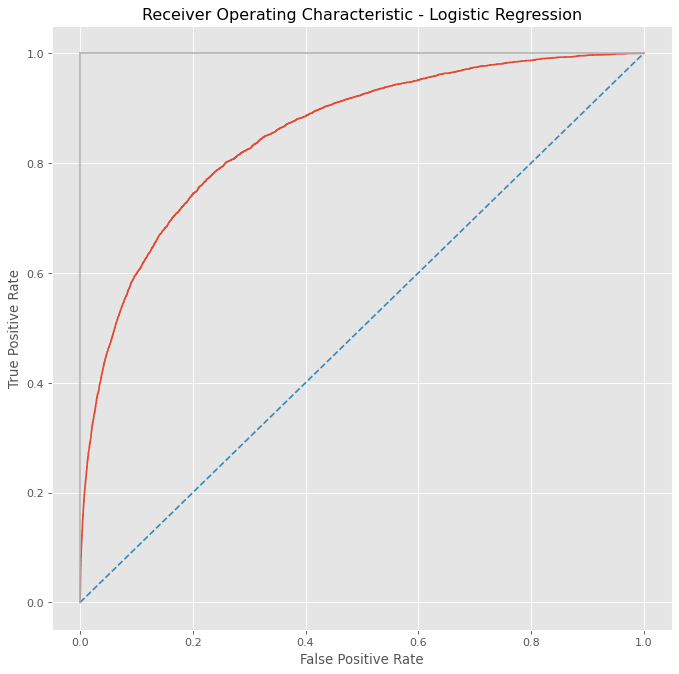

In [45]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(C=0.01,solver = 'sag') # Creating Logistic Regression classifier
roc_graph(log,X_train,y_train,'Logistic Regression')

## Naive Bayse

Accuracy on Testing Set: 0.92


 ------
Model AUC = 0.67
roc_auc_score for Naive Bayse:  0.8838963390723417


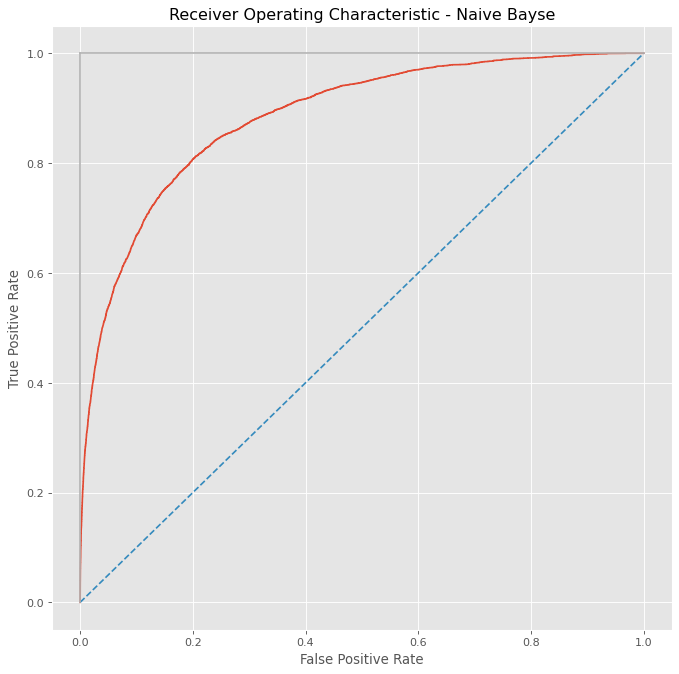

In [46]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
roc_graph(gnb,X_train,y_train,'Naive Bayse')

## XG Boost

Accuracy on Testing Set: 0.90


 ------
Model AUC = 0.54
roc_auc_score for XG Boost:  0.8599705165858873


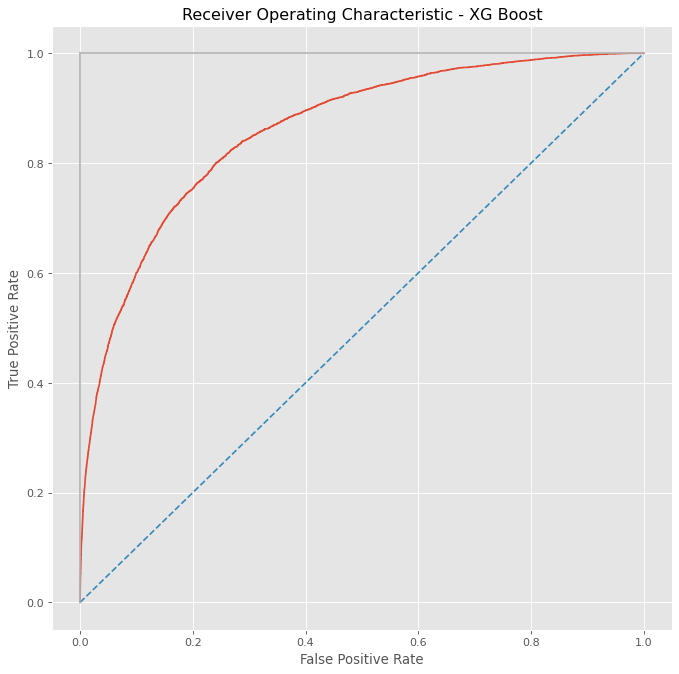

In [47]:
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier(max_depth=3, n_estimators=200, learn_rate=0.01)
roc_graph(xgb,X_train,y_train,'XG Boost')

From the preliminary analysis of the three models, it can be seen that the three models have better performance on the imbalanced dataset, but due to the imbalance of the dataset itself, more reference should be made to the AUC score.

In the three preliminarily established models, it can be seen that the scores of the three evaluation indicators for positive and negative samples are quite different. The scores for negative cases are higher, while the scores for positive cases are lower. That is, the model has higher classification accuracy for negative samples, but has weaker classification ability for positive samples.


In short, although the preliminary model we have established performs well for the sample classification in the test set, in terms of the coverage of the classification, it tends to cover more negative samples rather than positive samples.

### Over-sampling using SMOTE

With our training data created, I’ll up-sample the no-subscription using the SMOTE algorithm(Synthetic Minority Oversampling Technique). At a high level, SMOTE:
Works by creating synthetic samples from the minor class (no-subscription) instead of creating copies.
Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

In [32]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

print("The amount of data after Over-sampling: ",len(os_data_X))
print("0 type customer: ",len(os_data_y[os_data_y['y']==0]))
print("1 type customer: ",len(os_data_y[os_data_y['y']==1]))

The amount of data after Over-sampling:  270000
0 type customer:  135000
1 type customer:  135000


Accuracy on Testing Set: 0.79


 ------
AUC after SMOTE = 0.77
roc_auc_score for Logistic Regression:  0.8526170126410512


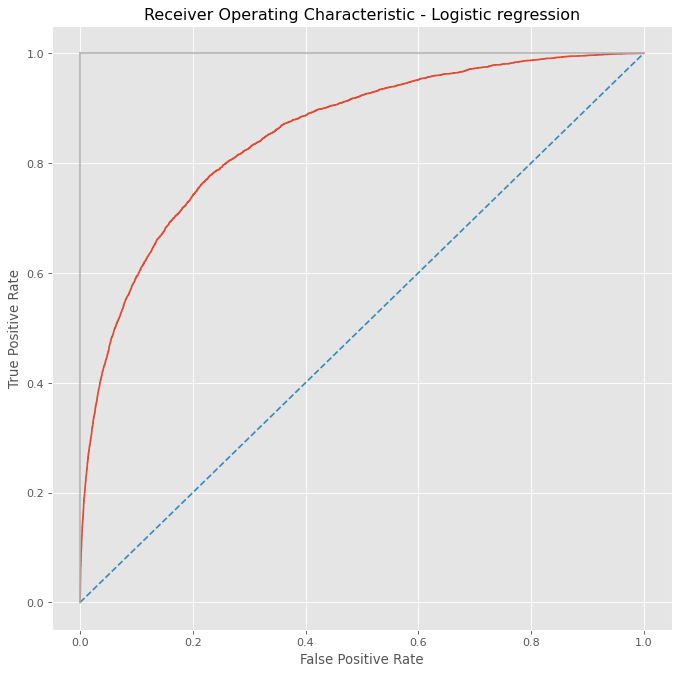

In [50]:
log_smote=LogisticRegression(C=0.01,solver = 'sag') 
log_smote.fit(os_data_X,os_data_y.values.reshape(-1))
print('Accuracy on Testing Set: {:.2f}'.format(log_smote.score(X_test, y_test)))  
print ("\n\n ------")

log_roc_auc = roc_auc_score(y_test, log_smote.predict(X_test))
print ("AUC after SMOTE = %2.2f" % log_roc_auc)


# Getting predicted probabilities
y_score = log_smote.predict_proba(X_test)[:,1]


 # Ploting Receiving Operating Characteristic Curve

# Creating true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score))

# Ploting ROC curves

plt.figure(figsize=(10,10),dpi  = 80)
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

It can be seen after the SMOTE sampling, the AUC score of the Logistic Regression model is changed from 0.63 to 0.77, which can significantly improve the model classification ability. 